## Competitor of UNVR Stock Comparison Analysis

#### Import Dependencies

In [1]:
import datetime as dt
import pandas as pd
import yfinance as yf

#### Specify Date Range for Analysis

In [2]:
end = dt.datetime.now()
start = dt.datetime(2017, 1, 1)
end, start

(datetime.datetime(2026, 2, 15, 22, 2, 2, 227654),
 datetime.datetime(2017, 1, 1, 0, 0))

#### Select the Stocks/Tickers Data

In [3]:
stocklist = ['UNVR', 'MYOR', 'ICBP']
stocks = [i + '.JK' for i in stocklist]
stocks

['UNVR.JK', 'MYOR.JK', 'ICBP.JK']

In [4]:
df = yf.download(stocks, start, end)
df.head()

[*********************100%***********************]  3 of 3 completed


Price             Close                                   High               \
Ticker          ICBP.JK      MYOR.JK      UNVR.JK      ICBP.JK      MYOR.JK   
Date                                                                          
2017-01-02  7089.163086  1428.172363  5740.632324  7089.163086  1428.172363   
2017-01-03  7109.831055  1519.332397  5744.331055  7130.499168  1736.379883   
2017-01-04  7109.831055  1545.377930  5947.769531  7233.839736  1597.469321   
2017-01-05  7089.163086  1519.332397  5999.552734  7192.503656  1558.400945   
2017-01-06  7047.826660  1523.673218  6006.951172  7151.167227  1536.696066   

Price                            Low                                   Open  \
Ticker          UNVR.JK      ICBP.JK      MYOR.JK      UNVR.JK      ICBP.JK   
Date                                                                          
2017-01-02  5740.632324  7089.163086  1428.172363  5740.632324  7089.163086   
2017-01-03  5799.813969  6944.486146  1428.172454  5740.632194  7027.158601   
2017-01-04  5969.962701  7089.162941  1467.240843  5748.031002  7089.162941   
2017-01-05  5999.552734  7068.494972  1519.332397  5921.876651  7109.831200   
2017-01-06  6058.735234  7047.826660  1501.968471  5892.286464  7151.167227   

Price                                    Volume                      
Ticker          MYOR.JK      UNVR.JK    ICBP.JK   MYOR.JK   UNVR.JK  
Date                                                                 
2017-01-02  1428.172363  5740.632324        0.0         0         0  
2017-01-03  1428.172454  5770.223081  2040600.0  10240300   5014500  
2017-01-04  1519.332234  5748.031002  4027100.0   3980400  10642000  
2017-01-05  1545.378096  5992.155012  3970900.0    542000  10493500  
2017-01-06  1536.696066  5962.564833  1497300.0   1006200   5400500

#### Access Close Price Attributes for use on graphs.

In [5]:
Close = df.Close
Close.head()

Ticker,ICBP.JK,MYOR.JK,UNVR.JK
Date,,,
2017-01-02,7089.163086,1428.172363,5740.632324
2017-01-03,7109.831055,1519.332397,5744.331055
2017-01-04,7109.831055,1545.377930,5947.769531
2017-01-05,7089.163086,1519.332397,5999.552734
2017-01-06,7047.826660,1523.673218,6006.951172


#### Plotting with Matplotlib (Price Close movement Comparison)

<Axes: xlabel='Date'>

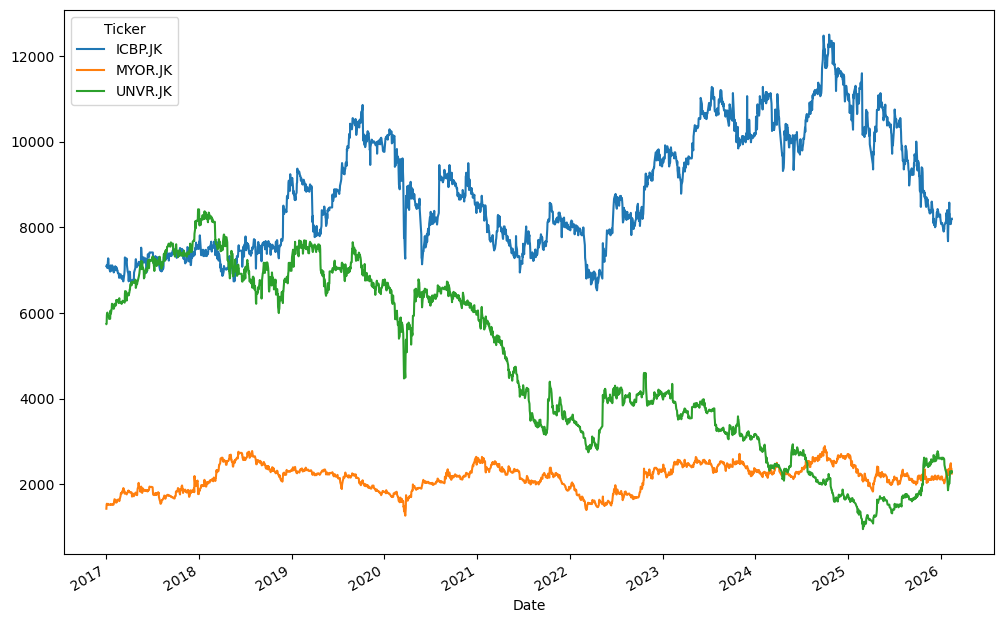

In [6]:
Close.plot(figsize = (12, 8))

#### Plotting with Plotly (Price Close movement Comparison)

In [7]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

pd.options.plotting.backend = 'plotly'

In [8]:
Close.plot()

#### Plotting with Plotly (Growth Percentage Comparison)

In [9]:
pct_growth = Close.ffill().pct_change(fill_method=None)
pct_growth = (1 + pct_growth).cumprod() - 1
pct_growth.tail()

Ticker,ICBP.JK,MYOR.JK,UNVR.JK
Date,,,
2026-02-09,0.139063,0.743487,-0.599347
2026-02-10,0.146116,0.652462,-0.599347
2026-02-11,0.153169,0.659464,-0.606315
2026-02-12,0.156695,0.617452,-0.599347
2026-02-13,0.156695,0.575440,-0.599347


In [10]:
pct_growth.plot (title='Growth percetage Comparison : UNVR vs ICBP vs MYOR')

#### Gain Insights Quickly with Pandas

In [11]:
Close[Close.index > end - dt.timedelta(days=100)].describe(percentiles = [0.1, 0.5, 0.9])

Ticker,ICBP.JK,MYOR.JK,UNVR.JK
count,65.000000,65.000000,65.000000
mean,8224.230769,2177.538462,2445.767465
std,205.013778,98.963863,211.418698
min,7675.000000,2020.000000,1860.000000
10%,8000.000000,2094.000000,2096.000000
50%,8225.000000,2150.000000,2513.992432
90%,8505.000000,2328.000000,2635.815137
max,8650.000000,2490.000000,2770.000000


#### Risk & Return Analysis 

##### Return Analysis

In [12]:
df_return = Close.pct_change()
avg_return = df_return.mean()
print(avg_return)

Ticker
ICBP.JK    0.000202
MYOR.JK    0.000414
UNVR.JK   -0.000169
dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_11684\2428513577.py:1: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



##### Risk Analysis

In [13]:
risk = df_return.std()
print(risk)

Ticker
ICBP.JK    0.016596
MYOR.JK    0.020747
UNVR.JK    0.021962
dtype: float64


#### Comparison of Stock Characteristics from the Histogram Chart

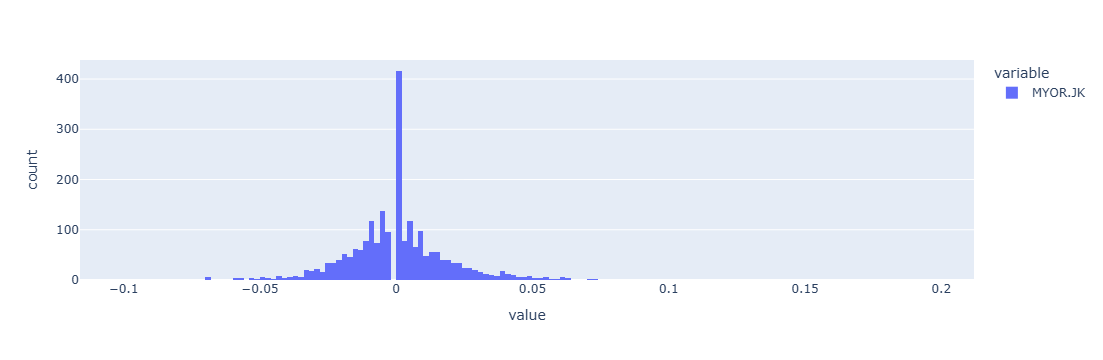

In [14]:
Close.plot()
Close['MYOR.JK'].pct_change().plot(kind='hist')

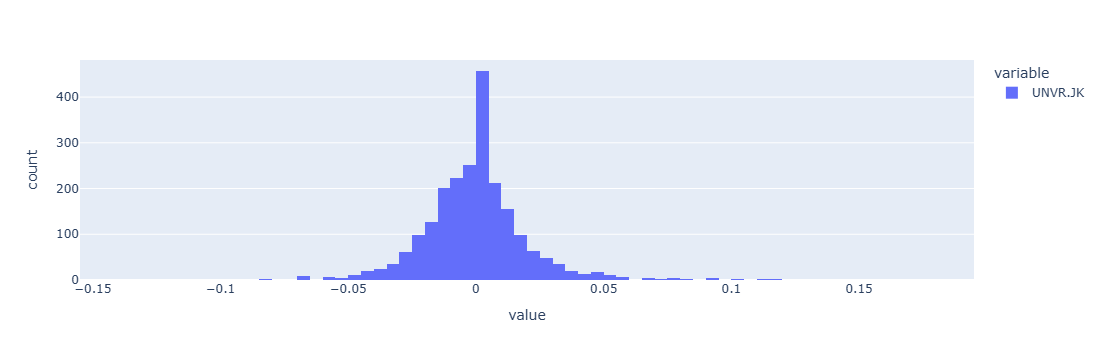

In [15]:
Close.plot()
Close['UNVR.JK'].pct_change().plot(kind='hist')

C:\Users\HP\AppData\Local\Temp\ipykernel_11684\1717026065.py:2: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



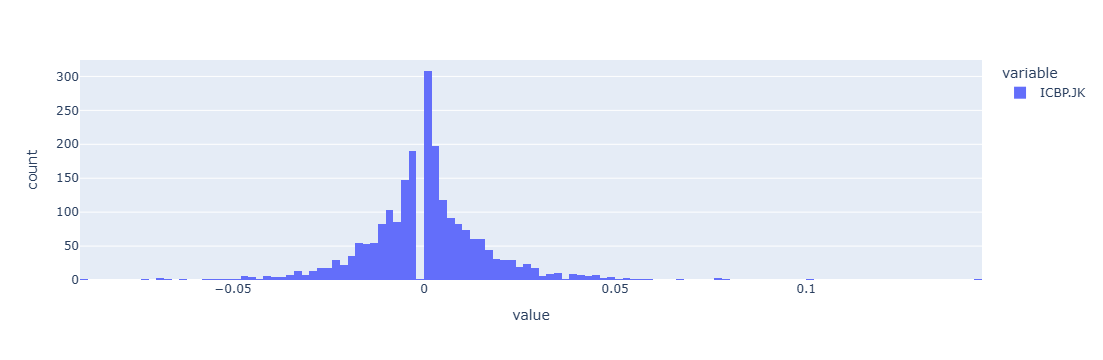

In [16]:
Close.plot()
Close['ICBP.JK'].pct_change().plot(kind='hist')